# Homework 8

In this assignment you will explore the sensitivity to initial conditions of the Lorenz dynamical system (refer back to the *Lectures* Canvas page for more information on this system). Use the template given below to start your work and comment carefully on every line of your code.

Recall, from our in-class discussions, that a trajectory of the Lorenz system is described by the following set of differential equations:

$$ \dot x= \sigma (y-x)$$

$$\dot y= x(\rho - z) - y$$

$$\dot z= xy - \beta z,$$

where a specific choice of initial conditions $(x,y,z)$ at time $t=0$ is given, say for example $(x(0),y(0),z(0))=(1,1,1)$.

The notation $\dot x$, etc means that we are considering the derivative $x'(t)$ of the function $x(t)$.

We focus on a specific choice of parameters $\rho=28.0$, $\sigma=10.0$, and $\beta=8.0 / 3.0$, for which it is known that the Lorenz system generates a *strange attractor*, and displays an unpredictable behavior that is localized around a complex structure that has (very roughly speaking) the shape of a butterfly.

One of the important properties of the Lorenz system is the fact that trajectories with very close initial conditions will quickly diverge and be completely unrelated in terms of their position in the strange attractor. This property is called *sensitivity to initial conditions*. 

To explore this behavior, answer the following questions:

**Question 1.** Consider the two initial conditions $(x_0(0),y_0(0),z_0(0))=(1,1,1)$ and $x_1(0),y_1(0),z_1(0))=(1,1,1+10^{-6})$. Evolve the Lorenz system with each of these initial conditions for $t$ in the time interval $[0, 40]$ and plot $x_0(t)$ and $x_1(t)$ as functions of $t$ *on a single plot*.


**Question 2.** How many oscillations does it take for $x_0$ and $x_1$ to be in distinct "wings" of the butterfly attractor? Device a computational method to automatically compute the "separation " time $T$ at which we can be sure that $x_0$ and $x_1$ are in distinct wings of the attractor (assuming you do not have access to the other variables of the system).


**Question 3.** Test the method you have devised in Question 2 for many pairs of initial conditions of the type $(x_0(0),y_0(0),z_0(0))$ and $(x_0(0),y_0(0),z_0(0)+10^{-6})$, where each coordinate in $(x_0(0),y_0(0),z_0(0))$ is uniformly distributed in the interval $[0.5,1.5]$. Plot an histogram of the resulting distribution of the separation time $T$. 

**Extra Credit Question.** As an extra credit question, try estimating automatically how many oscillations (of the function $x_0(t)$ ) does it take for the system to reach the separation time $T$ and plot an histogram of the distribution of the number of oscillations.

**Question 4.** Comment on your results and explore any other computational question you think it may be useful to better understand the sensitivity to initial conditions of the Lorenz system.

















(3, 189591)


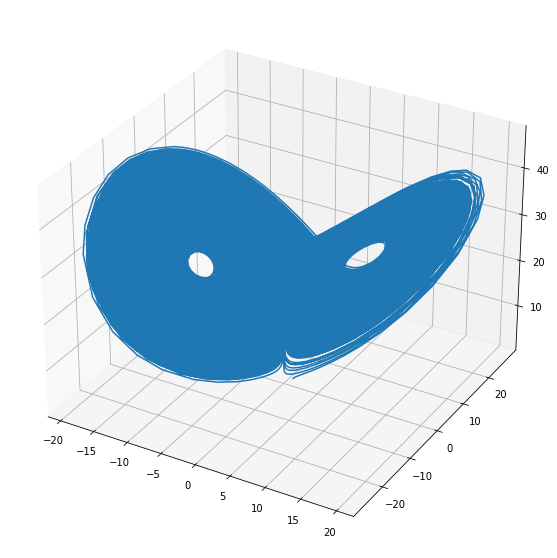

In [2]:
#Checked for accuracy, updated and adapted from the code available at https://en.wikipedia.org/wiki/Lorenz_system 
# Accessed on Nov 7 2022

import numpy as np
import matplotlib.pyplot as plt
#import the differential equations solver
from scipy.integrate import solve_ivp

#parameters of the Lorenz system
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

#function that defines the relation of state variables and their derivatives
def f(t,state):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
#t = np.arange(0.0, 40.0, 0.01)

#this is where the system is iterated to generate entire trajectories starting at state0
sol = solve_ivp(f,[0,4000], state0, method='BDF')

#extract the state of the system for all computed values of time (such values are stored in "sol.t")
states=sol.y

print(sol.y.shape)

fig = plt.figure(figsize=(10, 10))
#the state of the system is plotted in 3D
ax=plt.axes(projection="3d")
ax.plot(states[0,:], states[1,:], states[2,:])
plt.draw()
plt.show()

The code above is just sample code from what you gave us

In [3]:
state = [1.0, 1.0, 1.0]#variable we created
#t = np.arange(0.0, 40.0, 0.01)

#this is where the system is iterated to generate entire trajectories starting at state0
sol = solve_ivp(f,[0,40], state, method='BDF')#create a function to solve the ivp

#extract the state of the system for all computed values of time (such values are stored in "sol.t")
states=sol.y#create a function to solve the ivp

In [4]:
state1 = [1.0, 1.0, 1.0+10**-6]#variable we created
#t = np.arange(0.0, 40.0, 0.01)

#this is where the system is iterated to generate entire trajectories starting at state0
sol = solve_ivp(f,[0,40], state1, method='BDF')#create a function to solve the ivp

#extract the state of the system for all computed values of time (such values are stored in "sol.t")
estates=sol.y#create a function to solve the ivp

The two code cells above are defining my variables useing the function solve_ivp to evolve the lorenz system.

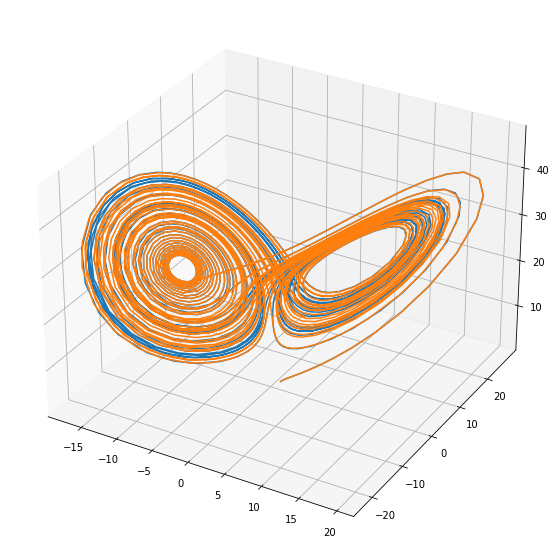

In [5]:
fig = plt.figure(figsize=(10, 10))#determine figure size
#the state of the system is plotted in 3D
ax=plt.axes(projection="3d")#makes figure 3d
ax.plot(states[0,:], states[1,:], states[2,:])#plot the three layers of the ivp of state
ax.plot(estates[0,:], estates[1,:], estates[2,:],)#plot the three layers of the ivp of +10**-6
plt.draw()
plt.show()

In this model we can still see the "butterfly" shape of the graph. Though there has been some major changes to the right hand side of the figure eight. As we can see in the graph, the hole is much larger on the right hand side.

Another thing thats fascinating is the minute difference in numbers is showing a visible change on the graph. When I first saw the numbers that we were using I thought that the graphs would overlap each other. (which they do sometimes) 

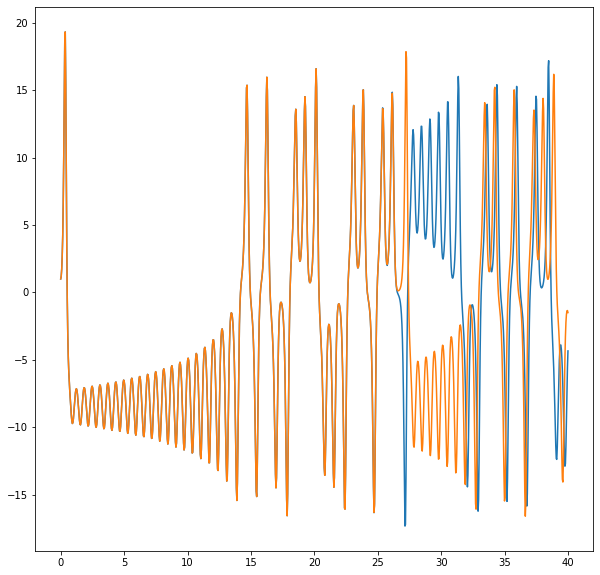

In [6]:
t_eval = np.linspace(0,40, 1000)#Return evenly spaced numbers over from 0-40 (1000)
t_span = (0, 40)#0-40, defining things to simplify solve_ivp
sol = solve_ivp(f, t_span, state1, t_eval=t_eval)#use a function to solve the ivp for state1
bol = solve_ivp(f, t_span, state, t_eval=t_eval)#use a function to solve the ivp for state
fig = plt.figure(figsize=(10, 10))#fig size
ax=plt.axes()
#the state of the system is plotted in 3D
plt.plot(sol.t, sol.y[0])#plot .t against .y
plt.plot(bol.t, bol.y[0])#plot .t against .y
plt.draw()
plt.show()

I have graphed one dimension of the butterfly graph against time. We can change the dimension by { plt.plot(sol.t, sol.y[0]) } changing the zero (0) in the brackets to either a [1] or [2]. They all look relatively similar. In this case I'm sticking with zero.

It's very intruiging that around the 27 mark on the x axis, we can see that the two graphs are in totally different sides of the graph and then converge to zero. It's crazy that a change that small can change the outcome in a dramamtic way.

In [7]:
state0 = np.random.uniform(low=0.5,high=1.5,size=3)#create a list of size=3 random numbers between 0.5-1.5
state1 = state0 + 10**(-9)*np.ones(3,)#adding +10**-9 to each iteration in the list

testtime = 40#defining a variable to help me with solve_ivp

eval=np.arange(0,testtime,0.01)#setting a variable for t_eval to simplify things
sol0 = solve_ivp(f, [0,testtime], state0, t_eval=eval)#use a function to solve the ivp for state0
sol1 = solve_ivp(f, [0,testtime], state1, t_eval=eval)#use a function to solve the ivp for state1

statese = sol0.y#create a variable for the y layer of the function of sol0
tatese = sol1.y#create a variable for the y layer of the function of sol1

(3, 4000)


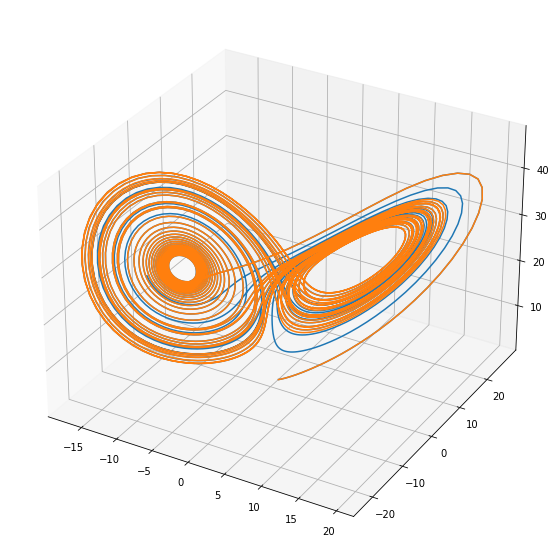

In [8]:
fig = plt.figure(figsize=(10,10))#fig size
ax=plt.axes(projection="3d")# make projection 3d
ax.plot(statese[0,:], statese[1,:], statese[2,:])#plot against each other of sol0
ax.plot(tatese[0,:], tatese[1,:], tatese[2,:],)#plot against each other of sol1

Compared to the first change of the butterfly this seems like the amount of line has decreased, there isn't as much depth. Though the shape is relative to the first change, by changing the interval from [0.5,1.5].
The left side looks like when you touch a calm pond as the ripples of your touch leave. 

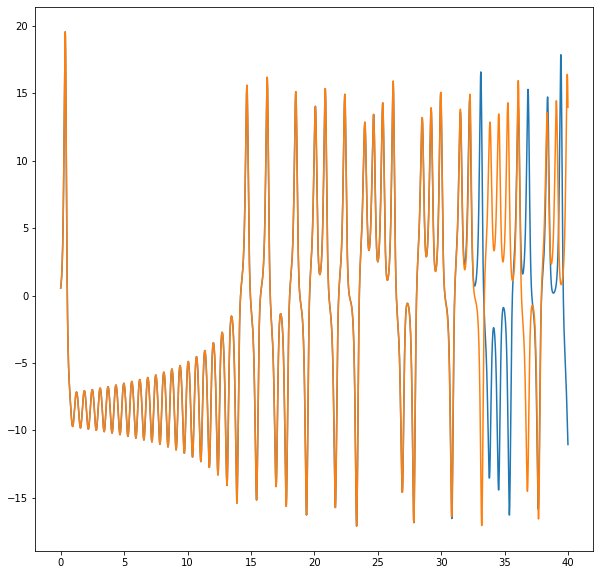

In [9]:
fig = plt.figure(figsize=(10, 10))#fig size
ax=plt.axes()
#the state of the system is plotted in 3D
plt.plot(sol0.t, sol0.y[0])#plot time against movement of [0]
plt.plot(sol1.t, sol1.y[0])#plot time against movement of [0]
plt.draw()
plt.show()

The is similar to the first one but we can see the change in the amount oscilations on one side of the "butterfly wing". The amount looks like it has dramatically decreased.

In [13]:
arrayzzz = np.zeros(500)#create an array of 500 of zeros
for j in range(500):#for loop
    staterbros = np.random.uniform(.5,1.5, 3)#create a list of size=3 random numbers between 0.5-1.5
    staterbros2 = staterbros + 10**(-9)*np.ones(3,)#adding 10**-9 to each iteration of the previous statement
    
    testtime = 40#variable to simplify things

    t_eval=np.arange(0,testtime,0.01)#variable to simplify things
    sol2 = solve_ivp(f, [0,testtime], staterbros, t_eval=t_eval)#solving ivp
    sol3 = solve_ivp(f, [0,testtime], staterbros2, t_eval=t_eval)#solving ivp
    for i in range(4000):#for loop
        test = sol2.y[0,i]*sol3.y[0,i]#create value for test
        if test <-1:#if statement to check if wings are in distinct wings of the attractor
            break#break
        T_sep=eval[i]#defining variable
        i_sep=i
        arrayzzz[j] = (T_sep)#adding variable to list

<function matplotlib.pyplot.show(close=None, block=None)>

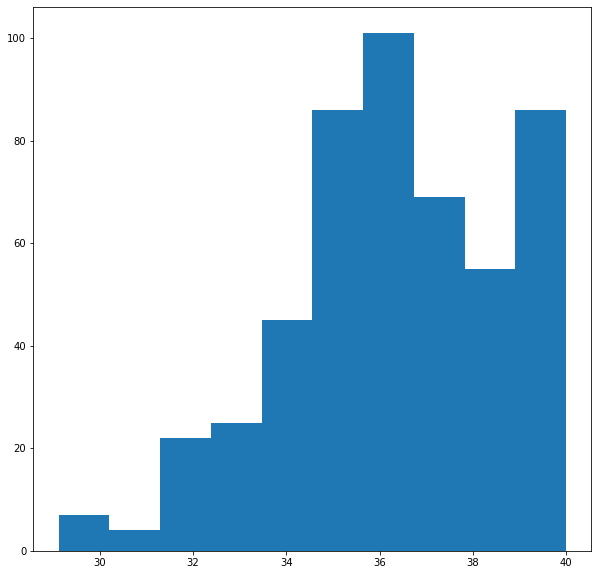

In [16]:
fig = plt.figure(figsize=(10, 10))#fig size
plt.hist(arrayzzz)#plot histogram of list
plt.show

The histogram shows the resulting distribution of the separation time. As we can see varying the first state by a value 10^(-9), A very small number, changes the position of the graph (relative to time) very noticably. In the graphs that look like waves we can see it easier. When the blue and orange graphs diverge from each other they are in different separated.

With a little research I have found that the lorenz system is a simplified version of the chaos theory, which implements the idea of the butterfly effect. "of how a minor change can lead to larger changes". We saw that in our data above as a change in the 10^-9 changed the oscilations and the shape of the graph.